In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

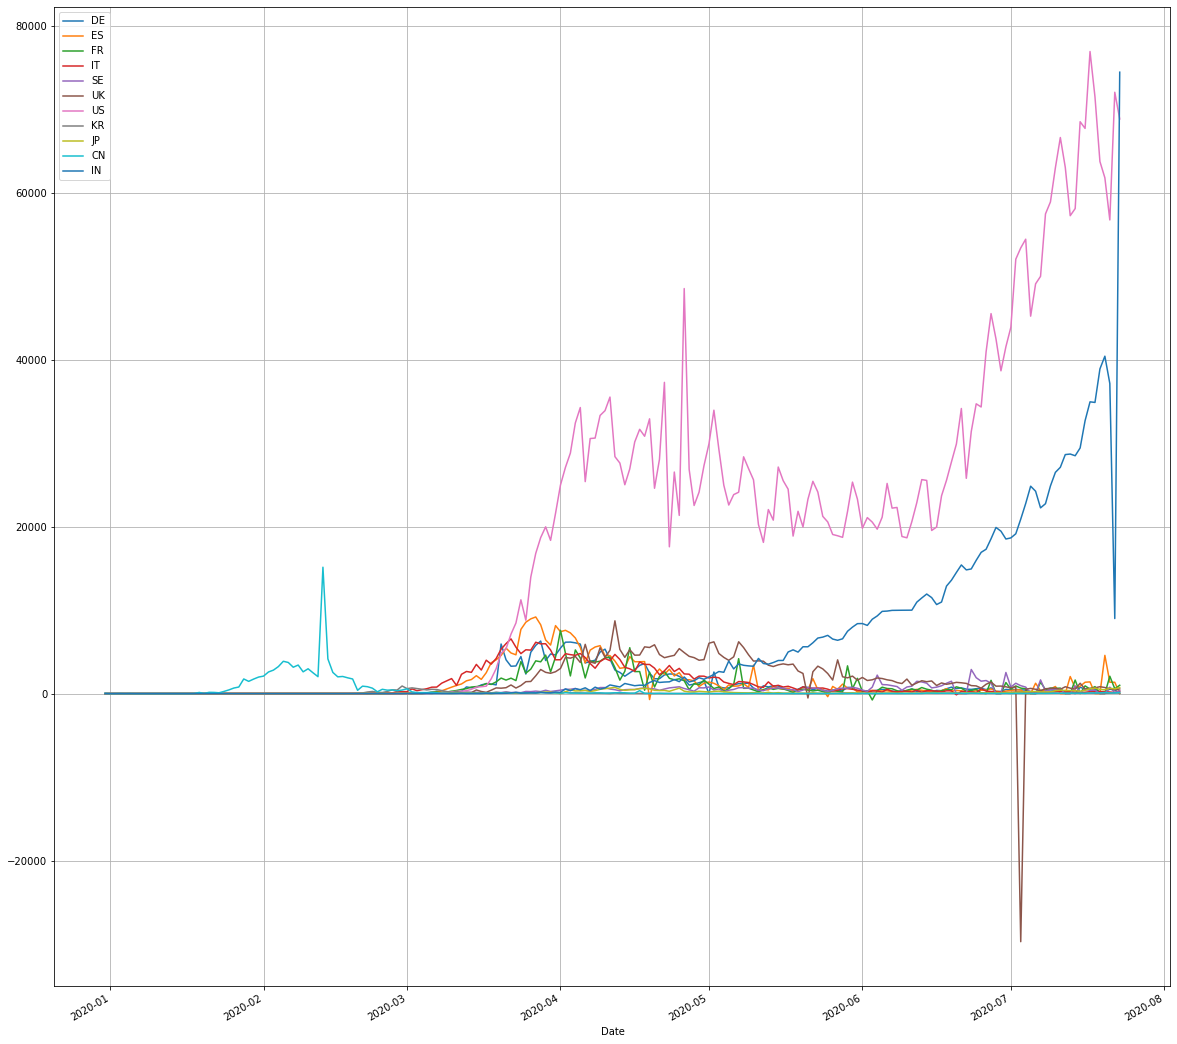

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

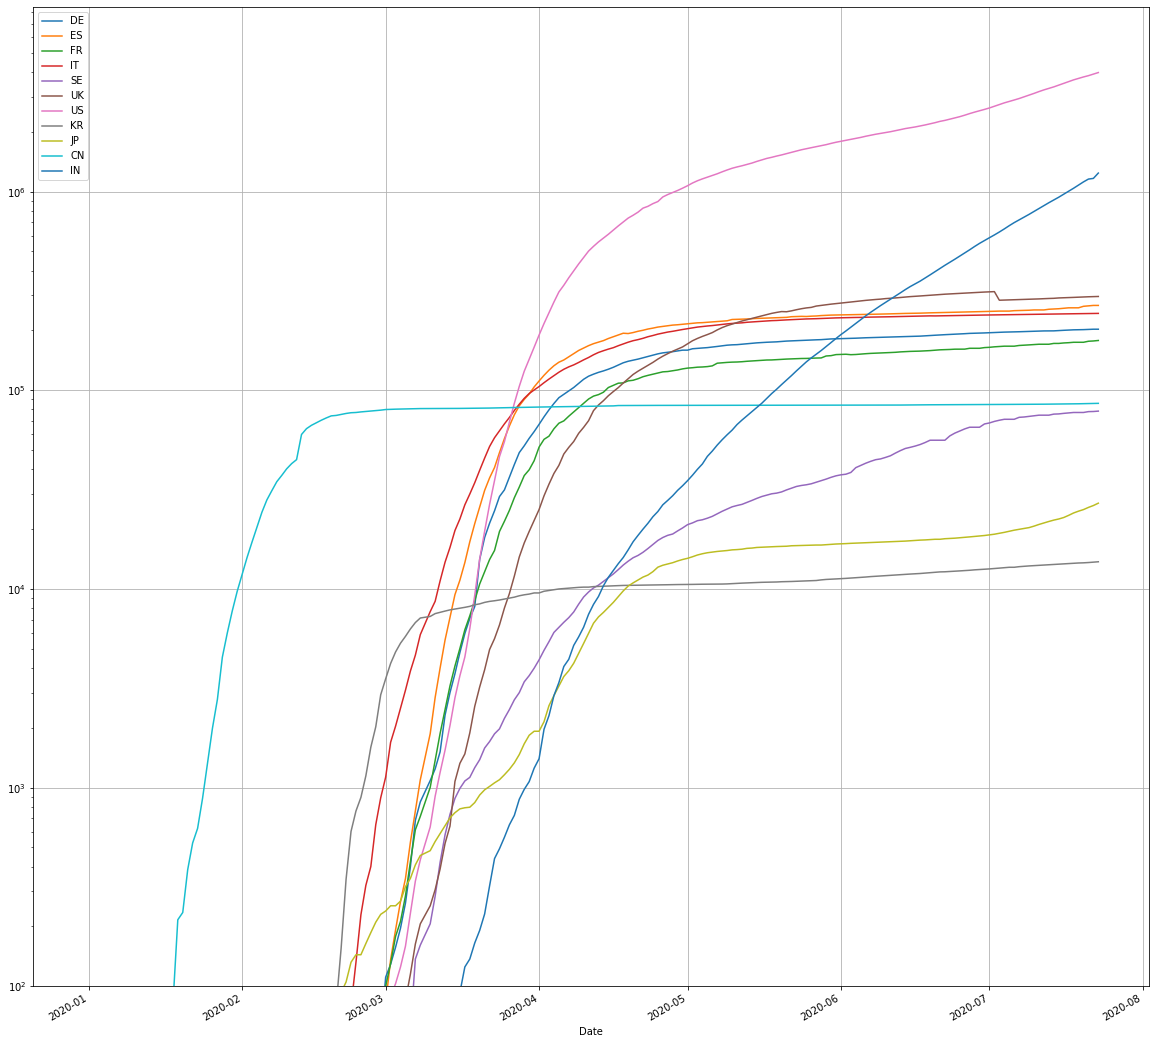

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

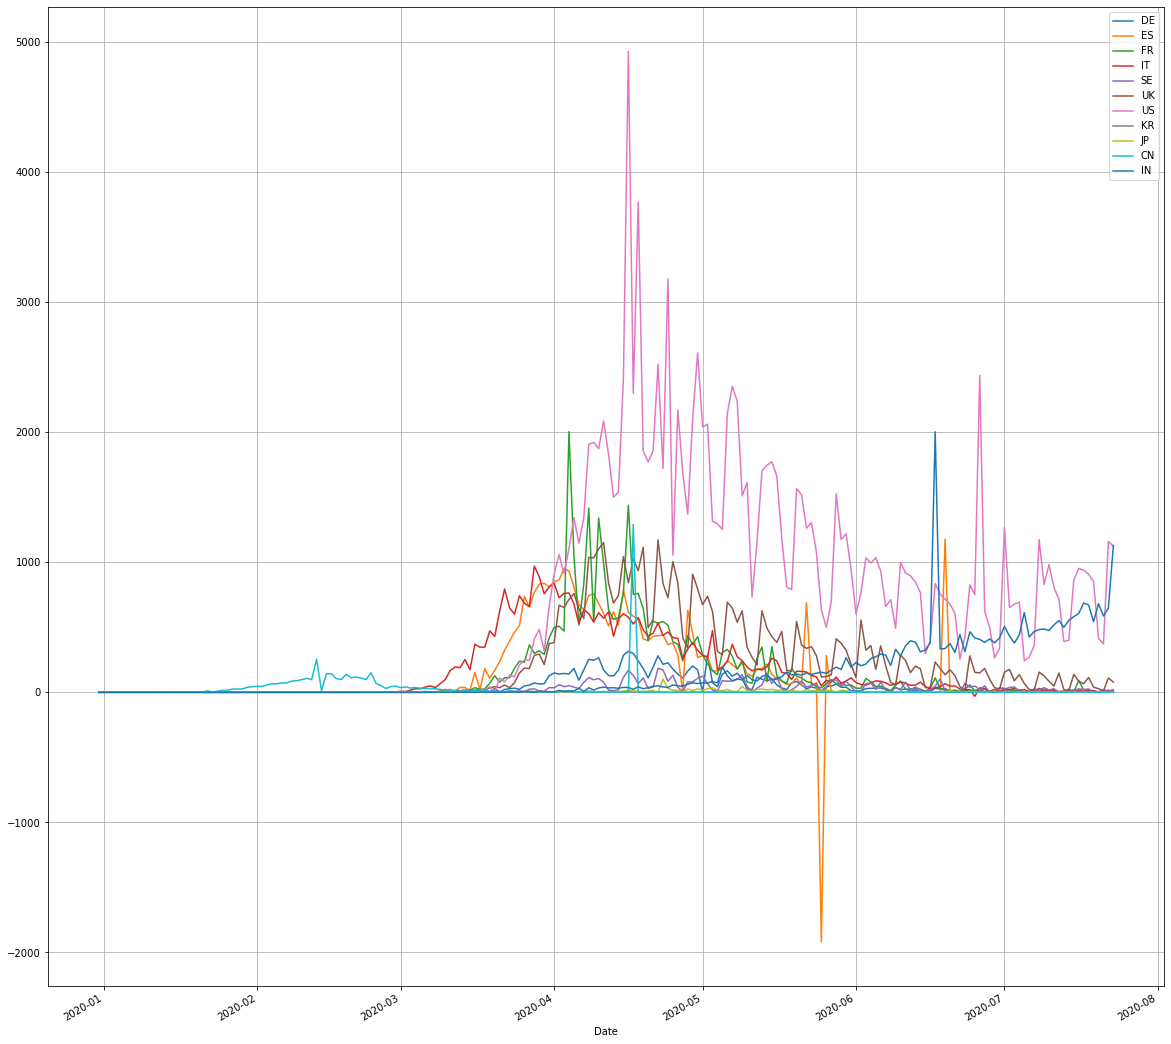

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

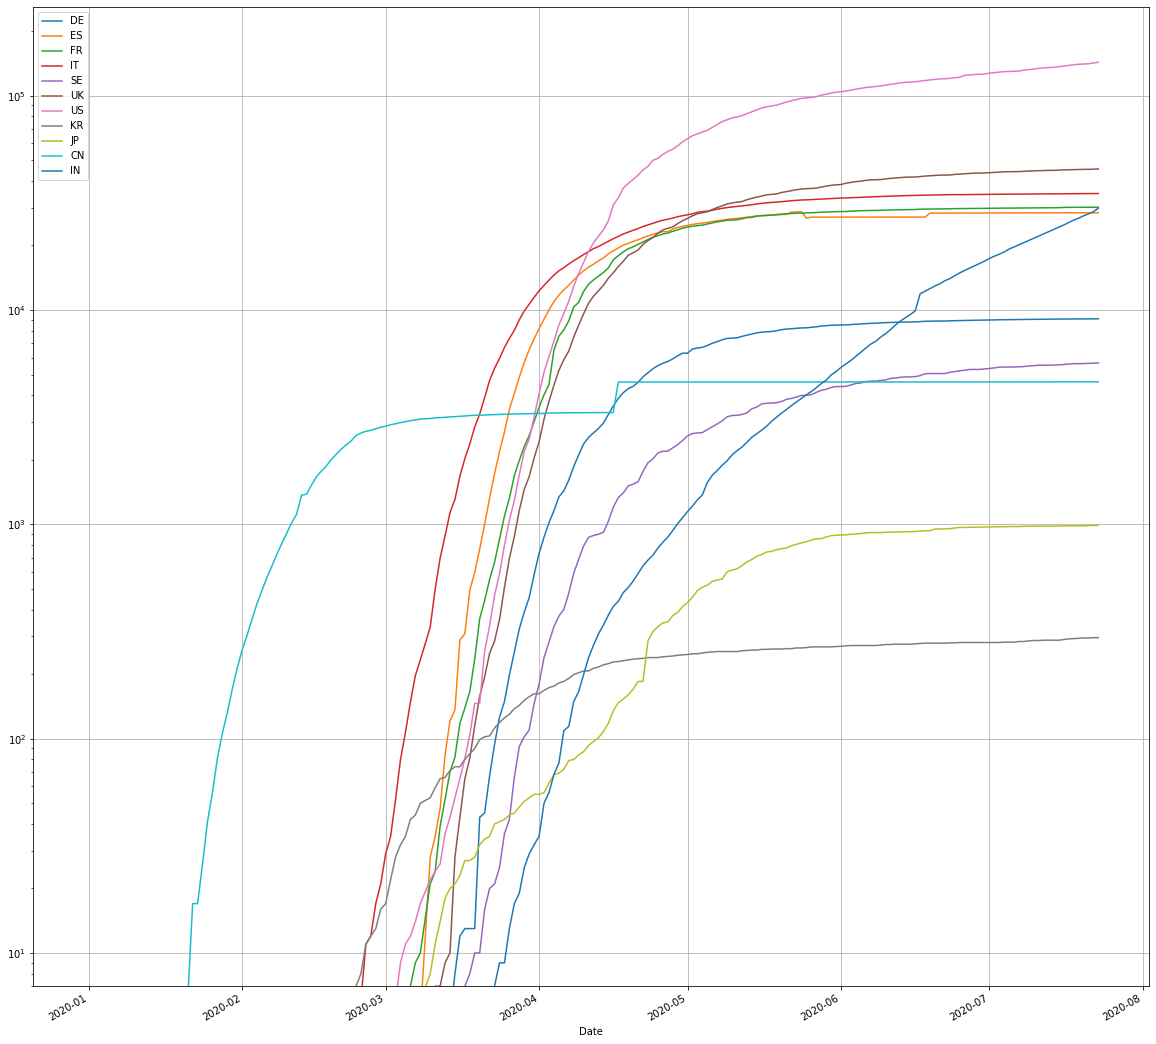

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-07-09,442.0,543.0,663,193,514,630,58906,49,197,33,24879
12,2020-07-10,395.0,852.0,621,214,475,642,63004,45,348,46,26506
11,2020-07-11,378.0,0.0,658,276,565,512,66625,35,410,40,27114
10,2020-07-12,248.0,0.0,0,188,0,820,63051,44,373,35,28637
9,2020-07-13,159.0,2045.0,0,234,0,650,57258,62,366,46,28701
8,2020-07-14,0.0,666.0,1625,169,928,530,58114,33,352,55,28498
7,2020-07-15,763.0,875.0,0,114,175,1240,68518,39,288,54,29429
6,2020-07-16,534.0,1361.0,927,162,491,538,67717,61,382,20,32695
5,2020-07-17,583.0,1400.0,534,230,385,641,76930,60,583,77,34956
4,2020-07-18,529.0,0.0,836,231,404,687,71494,39,659,80,34884


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-07-09,197728.0,252623.0,169063.0,240657.0,73816.0,286912.0,3054883.0,13045.0,20338.0,84905.0,767296.0
2020-07-10,198123.0,253475.0,169684.0,240871.0,74291.0,287554.0,3117887.0,13090.0,20686.0,84951.0,793802.0
2020-07-11,198501.0,253475.0,170342.0,241147.0,74856.0,288066.0,3184512.0,13125.0,21096.0,84991.0,820916.0
2020-07-12,198749.0,253475.0,170342.0,241335.0,74856.0,288886.0,3247563.0,13169.0,21469.0,85026.0,849553.0
2020-07-13,198908.0,255520.0,170342.0,241569.0,74856.0,289536.0,3304821.0,13231.0,21835.0,85072.0,878254.0
2020-07-14,198908.0,256186.0,171967.0,241738.0,75784.0,290066.0,3362935.0,13264.0,22187.0,85127.0,906752.0
2020-07-15,199671.0,257061.0,171967.0,241852.0,75959.0,291306.0,3431453.0,13303.0,22475.0,85181.0,936181.0
2020-07-16,200205.0,258422.0,172894.0,242014.0,76450.0,291844.0,3499170.0,13364.0,22857.0,85201.0,968876.0
2020-07-17,200788.0,259822.0,173428.0,242244.0,76835.0,292485.0,3576100.0,13424.0,23440.0,85278.0,1003832.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-07-09,12.0,5.0,32,15,35,126,829,2,1,0,487
12,2020-07-10,6.0,2.0,14,12,18,85,982,1,1,0,475
11,2020-07-11,6.0,0.0,25,12,26,48,806,0,0,0,519
10,2020-07-12,3.0,0.0,0,7,0,148,717,1,0,0,551
9,2020-07-13,1.0,3.0,0,9,0,21,391,0,0,0,500
8,2020-07-14,0.0,3.0,25,13,10,11,400,0,0,1,553
7,2020-07-15,7.0,4.0,0,17,9,138,861,0,2,0,582
6,2020-07-16,7.0,3.0,91,13,27,85,953,2,1,2,606
5,2020-07-17,4.0,4.0,18,20,21,66,939,2,0,0,687
4,2020-07-18,1.0,0.0,14,11,26,114,908,1,0,1,671


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-07-09,9048.0,28401.0,29956.0,34781.0,5482.0,44517.0,132305.0,286.0,980.0,4618.0,21129.0
2020-07-10,9054.0,28403.0,29970.0,34793.0,5500.0,44602.0,133287.0,287.0,981.0,4618.0,21604.0
2020-07-11,9060.0,28403.0,29995.0,34805.0,5526.0,44650.0,134093.0,287.0,981.0,4618.0,22123.0
2020-07-12,9063.0,28403.0,29995.0,34812.0,5526.0,44798.0,134810.0,288.0,981.0,4618.0,22674.0
2020-07-13,9064.0,28406.0,29995.0,34821.0,5526.0,44819.0,135201.0,288.0,981.0,4618.0,23174.0
2020-07-14,9064.0,28409.0,30020.0,34834.0,5536.0,44830.0,135601.0,288.0,981.0,4619.0,23727.0
2020-07-15,9071.0,28413.0,30020.0,34851.0,5545.0,44968.0,136462.0,288.0,983.0,4619.0,24309.0
2020-07-16,9078.0,28416.0,30111.0,34864.0,5572.0,45053.0,137415.0,290.0,984.0,4621.0,24915.0
2020-07-17,9082.0,28420.0,30129.0,34884.0,5593.0,45119.0,138354.0,292.0,984.0,4621.0,25602.0
